In [2]:
import sympy as sym
from IPython.display import display
from IPython.core.display import Math
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from matplotlib.patches import Polygon
import sympy.plotting.plot as symplot 
import scipy as sp

sym.init_printing()


In [3]:
a = np.arange(1, 6)
expr1 = np.sum(a)/np.sum(a**2) - 1/np.sum(a)
expr2 = np.prod(a)/np.prod(a**2) - 1/np.prod(a)

display(Math(sym.latex(expr1)))
display(Math(sym.latex(expr2)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

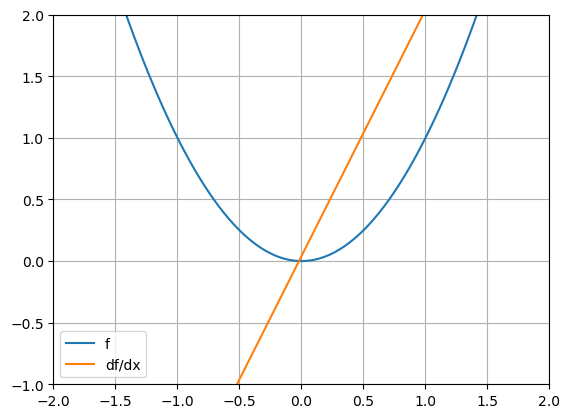

In [4]:
x = np.linspace(-2, 2, 100)

y = x**2
y1 = np.diff(y)/np.diff(x)


axis = plt.gca()
axis.set_xlim([-2, 2])
axis.set_ylim([-1, 2])
plt.plot(x, y, label='f')
plt.plot(x[:-1], y1,label = 'df/dx')
plt.legend()
plt.grid()
plt.show()


In [5]:
x = sym.symbols('x')

for i in range(1, 10):
    coeffs = np.arange(1, i+1)
    print(f'A degree {len(coeffs)} polynomial has {len(np.roots(coeffs))+1} roots')



A degree 1 polynomial has 1 roots
A degree 2 polynomial has 2 roots
A degree 3 polynomial has 3 roots
A degree 4 polynomial has 4 roots
A degree 5 polynomial has 5 roots
A degree 6 polynomial has 6 roots
A degree 7 polynomial has 7 roots
A degree 8 polynomial has 8 roots
A degree 9 polynomial has 9 roots


C:\Users\kantu\AppData\Local\Temp\ipykernel_1200\648217447.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  out[0] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
C:\Users\kantu\AppData\Local\Temp\ipykernel_1200\648217447.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  out[1] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)


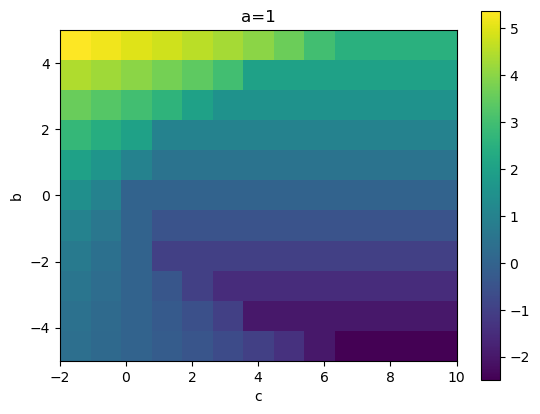

In [6]:
def quadeq(a, b, c):
    out = np.zeros(2)

    out[0] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)

    return out


a = 1
b = np.arange(-5, 6)
c = np.arange(-2, 11)

matr = np.zeros((len(b), len(c)))

for bi in range(0, len(b)):
    for ci in range(0, len(c)):
        matr[bi, ci] = quadeq(a, b[bi], c[ci])[0]


plt.imshow(matr, extent=[c[0], c[-1], b[0], b[-1]])
plt.xlabel('c')
plt.ylabel('b')
plt.colorbar()
plt.title('a='+str(a))
plt.show()


In [7]:
from numpy import imag, real


w = complex(2, 4)
z = complex(5, 6)
real(w)

print(complex(real(z), imag(z)) + complex(real(w), imag(w)))
print(w + z)


(7+10j)
(7+10j)


In [8]:
from numpy import conj
a, b = sym.symbols("a,b", real=True)

z = a + b*sym.I

display(Math(
    f' z \\times z^* = {sym.latex(sym.expand(z * conj(z)))}'))


<IPython.core.display.Math object>

In [9]:
z = complex(4, 2)
w = complex(3, 5)

expr = (((z-1) * z*w+w)/(w*z-w)) * (((w-1)*(1-w))/(-z*w**2-w**2+2*w*z+2*w-z-1))

display(Math(sym.latex(sym.sympify(expr))))


<IPython.core.display.Math object>

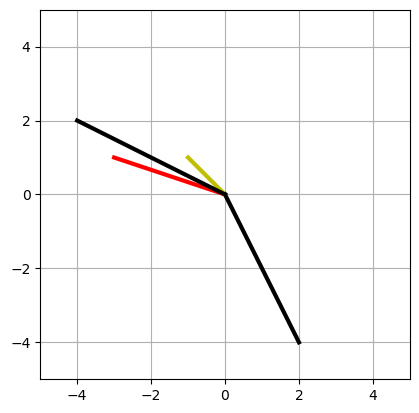

In [10]:
z1 = complex(-3,1)
z2 = complex(-1,1)

plt.plot([0,np.real(z1)],[0,np.imag(z1)],'r',linewidth=3)
plt.plot([0,np.real(z2)],[0,np.imag(z2)],'y',linewidth=3)
plt.plot([0,np.real(z1+z2)],[0,np.imag(z1+z2)],'k',linewidth=3)
plt.plot([0,np.real(z1*z2)],[0,np.imag(z1*z2)],'k',linewidth=3)
plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()

plt.show()

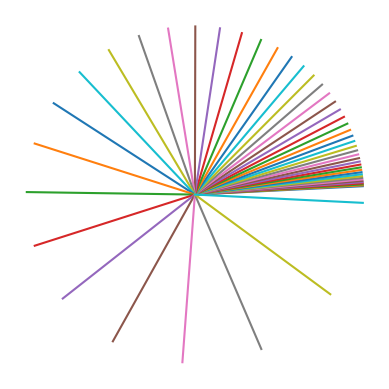

In [30]:
x = np.linspace(-3, 1.83, 50)

k = np.exp(x)
for i in range(0, len(x)):
    plt.plot([0, np.cos(k[i])], [0, np.sin(k[i])])
plt.axis('square')
plt.axis('off')
plt.show()
